<a href="https://colab.research.google.com/github/Kunwar-Bhattal/Fruits-and-Vegetable-Recognition/blob/main/Testing_ImageRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

## **Loading Model**

In [2]:
cnn = tf.keras.models.load_model('/content/drive/MyDrive/ML_Models/FruitVegetables/trained_model_ImageRecognition.h5')

## **Visualising**

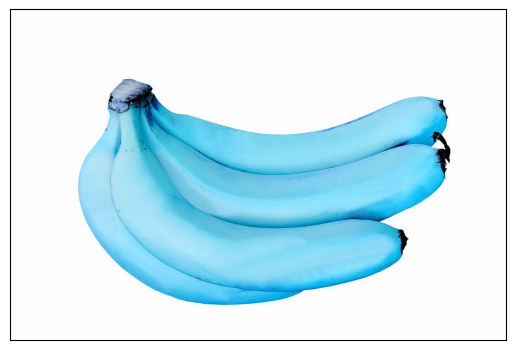

In [4]:
import cv2
image_path= '/content/drive/MyDrive/ML_Data/FruitVegetablesData/test/banana/Image_1.jpg'
img = cv2.imread(image_path)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

## **Performing a single Prediction**

In [10]:
# We need to change image to a 2D array
image = tf.keras.preprocessing.image.load_img(image_path,target_size = [64,64]) #targetsize from previous ipynb
input_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = np.array([input_array])   #converts single image to 2D array(batch)

# Now we predict based on 2D array
pred = cnn.predict(image_array)

1/1 [==============================] - 0s 170ms/step


In [11]:
print(pred)

[[1.1033884e-07 9.9615341e-01 2.9671722e-07 5.9547619e-07 6.4031938e-06
  3.8240099e-08 2.4313091e-05 8.9146118e-07 2.2814713e-07 1.2179237e-05
  9.8951216e-07 1.3167110e-09 1.0614468e-06 6.3532789e-06 5.1857586e-07
  1.7617230e-08 5.2324226e-06 1.0237198e-06 5.0593758e-06 2.0041111e-06
  4.4851527e-07 8.5282936e-06 3.7925943e-08 1.6915867e-04 4.3715130e-07
  2.4124943e-03 1.1931770e-07 7.1039707e-08 6.3497748e-05 4.5939350e-06
  2.0662606e-05 1.4990220e-05 5.0142108e-09 5.0021395e-06 1.0786677e-03
  3.9814390e-07]]


In [12]:
# from file1: we copied:
test_data = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/ML_Data/FruitVegetablesData/test',
    labels = "inferred",
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
    )

Found 359 files belonging to 36 classes.


In [15]:
test_data.class_names

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 36), dtype=tf.float32, name=None))>

In [21]:
def predic(arr):
  pred = np.array(cnn.predict(arr))
  return test_data.class_names[pred.argmax()]

predic(image_array)

1/1 [==============================] - 0s 34ms/step


'banana'

In [31]:
def predic(address):
  image = tf.keras.preprocessing.image.load_img(address,target_size = [64,64]) #targetsize from previous ipynb
  input_array = tf.keras.preprocessing.image.img_to_array(image)
  image_array = np.array([input_array])
  pred = np.array(cnn.predict(image_array))
  return test_data.class_names[pred.argmax()]

predic('/content/drive/MyDrive/ML_Data/FruitVegetablesData/test/cabbage/Image_6.jpg')

1/1 [==============================] - 0s 29ms/step


'cabbage'

To predict a picture, Pass its address or relative path into the function "predic()"

eg. predic("/content/drive/MyDrive/ML_Data/FruitVegetablesData/test/cabbage/Image_6.jpg")